In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("country_vaccination_stats.csv")
df

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,NaN,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,11105.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,12318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,15148.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,17371.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


## ** Q4 **

<AxesSubplot: >

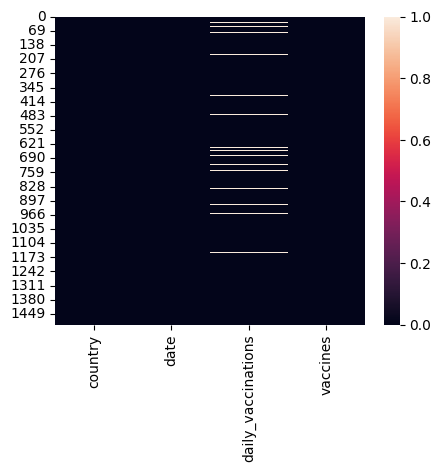

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(df.isna())

In [54]:
df['daily_vaccinations'] = df.groupby('country')['daily_vaccinations'].apply(lambda x: x.fillna(x.min()))
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(0)

C:\Users\MERT\AppData\Local\Temp\ipykernel_13180\3032461672.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['daily_vaccinations'] = df.groupby('country')['daily_vaccinations'].apply(lambda x: x.fillna(x.min()))


## ** Q5 **

In [63]:
df.groupby('country')['daily_vaccinations'].median().sort_values(ascending=False)[0:3]

country
United States    378253.0
China            276786.0
India            173922.0
Name: daily_vaccinations, dtype: float64

## ** Q6 **

In [69]:
df[df.date == '1/6/2021']['daily_vaccinations'].sum()

1485255.0

## ** Q7 **

In [70]:
UPDATE df
SET daily_vaccinations = COALESCE(daily_vaccinations, 0)
WHERE daily_vaccinations IS NULL;

UPDATE df
SET daily_vaccinations = COALESCE(daily_vaccinations, (SELECT MIN(daily_vaccinations) FROM df AS tb2 WHERE tb2.country = df.country))
WHERE daily_vaccinations IS NULL;

SyntaxError: invalid syntax (2076706841.py, line 1)